In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
num_classes = 10
batch_size = 100
baseline = 1. / num_classes
alpha = 0.1
stats = []

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001))

In [8]:
for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:(i + batch_size)]
    y_batch = y_train[i:(i + batch_size)]

    # predict class probabilities
    y_pred = model.predict(x_batch)

    # sample from those probabilities
    y_sample = np.empty((batch_size,), dtype=np.integer)
    for j, p in enumerate(y_pred):
        y_sample[j] = np.random.choice(num_classes, p=p)

    # calculate accuracy for logging
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred == y_batch)

    # calculate reward and advantage, update baseline
    reward = (y_sample == y_batch)
    advantage = reward - baseline
    baseline = alpha * np.mean(reward) + (1 - alpha) * baseline

    # train with samples as targets and advantage as sample weight
    loss = model.train_on_batch(x_batch, y_sample, sample_weight = advantage)
    
    # log statistics
    stats.append((loss, accuracy, baseline))
    print(i, loss, accuracy, baseline)

(0, 0.044087067, 0.14000000000000001, 0.10200000000000001)
(100, -0.10413129, 0.13, 0.097800000000000012)
(200, 0.080282539, 0.089999999999999997, 0.10202000000000001)
(300, 0.0075094728, 0.20999999999999999, 0.10281800000000001)
(400, 0.043108791, 0.080000000000000002, 0.10353620000000001)
(500, 0.041850995, 0.14999999999999999, 0.10618258000000001)
(600, 0.079709254, 0.17000000000000001, 0.10956432200000001)
(700, -0.071023956, 0.12, 0.1076078898)
(800, 0.084537312, 0.14000000000000001, 0.11284710082)
(900, 0.081346281, 0.23999999999999999, 0.11956239073800001)
(1000, -0.039571516, 0.40999999999999998, 0.12160615166420001)
(1100, 0.13125044, 0.42999999999999999, 0.13044553649778001)
(1200, 0.10037372, 0.42999999999999999, 0.13940098284800201)
(1300, -0.11314566, 0.44, 0.14446088456320183)
(1400, -0.023015862, 0.44, 0.15301479610688165)
(1500, 0.02543515, 0.42999999999999999, 0.17071331649619348)
(1600, 0.042948999, 0.47999999999999998, 0.19164198484657413)
(1700, -0.075911902, 0.44, 

(13800, 0.058379125, 0.71999999999999997, 0.67703653476137582)
(13900, -1.2932694, 0.70999999999999996, 0.67733288128523816)
(14000, -0.55008054, 0.71999999999999997, 0.68159959315671437)
(14100, -1.0405397, 0.64000000000000001, 0.678439633841043)
(14200, -0.46549129, 0.68000000000000005, 0.67959567045693869)
(14300, -0.57314223, 0.69999999999999996, 0.68163610341124481)
(14400, -0.70218384, 0.70999999999999996, 0.68447249307012026)
(14500, -1.0110843, 0.60999999999999999, 0.67802524376310824)
(14600, -1.0762947, 0.60999999999999999, 0.67022271938679734)
(14700, -1.7573061, 0.59999999999999998, 0.66320044744811768)
(14800, -0.84415716, 0.68000000000000005, 0.66488040270330595)
(14900, -0.70077896, 0.76000000000000001, 0.67439236243297529)
(15000, -1.0857259, 0.69999999999999996, 0.67695312618967773)
(15100, -0.85997176, 0.68000000000000005, 0.67725781357070991)
(15200, -1.2095715, 0.66000000000000003, 0.67753203221363889)
(15300, -0.34819797, 0.76000000000000001, 0.68577882899227505)
(

(27300, -0.43735993, 0.80000000000000004, 0.79076877788270417)
(27400, -1.5342188, 0.70999999999999996, 0.78269190009443368)
(27500, -0.49660435, 0.84999999999999998, 0.78942271008499032)
(27600, -0.68668836, 0.82999999999999996, 0.79348043907649124)
(27700, -0.82220894, 0.81000000000000005, 0.79513239516884204)
(27800, -0.50907433, 0.85999999999999999, 0.80161915565195785)
(27900, -0.87513292, 0.81999999999999995, 0.803457240086762)
(28000, -0.26728258, 0.87, 0.81011151607808574)
(28100, -0.24577232, 0.83999999999999997, 0.81310036447027711)
(28200, -0.49479508, 0.83999999999999997, 0.81679032802324936)
(28300, -0.99046308, 0.78000000000000003, 0.81311129522092451)
(28400, -0.39079294, 0.84999999999999998, 0.81680016569883207)
(28500, -0.8886441, 0.87, 0.82212014912894882)
(28600, -0.39385673, 0.78000000000000003, 0.81790813421605391)
(28700, -0.75239968, 0.78000000000000003, 0.81411732079444854)
(28800, -1.1587834, 0.81000000000000005, 0.81470558871500365)
(28900, -1.540947, 0.760000

(41300, -0.60605168, 0.82999999999999996, 0.82902505722262188)
(41400, -0.95461553, 0.83999999999999997, 0.83112255150035963)
(41500, -1.2261598, 0.80000000000000004, 0.82801029635032375)
(41600, -0.62236446, 0.84999999999999998, 0.83120926671529138)
(41700, -0.82358861, 0.84999999999999998, 0.8330883400437622)
(41800, -0.29258594, 0.85999999999999999, 0.835779506039386)
(41900, -1.4207661, 0.77000000000000002, 0.82920155543544749)
(42000, -0.098932125, 0.88, 0.83428139989190275)
(42100, -1.0445787, 0.83999999999999997, 0.83485325990271242)
(42200, -0.75487351, 0.82999999999999996, 0.83436793391244113)
(42300, -1.2685825, 0.77000000000000002, 0.8279311405211971)
(42400, -1.4910752, 0.80000000000000004, 0.82513802646907752)
(42500, -0.92148709, 0.79000000000000004, 0.82162422382216982)
(42600, -1.6298566, 0.81999999999999995, 0.82146180143995284)
(42700, -0.80159903, 0.84999999999999998, 0.82431562129595759)
(42800, -0.29850599, 0.83999999999999997, 0.82688405916636176)
(42900, -0.96453

(54900, -0.7841056, 0.78000000000000003, 0.84835253465451443)
(55000, -0.71616578, 0.87, 0.850517281189063)
(55100, -0.73867005, 0.84999999999999998, 0.8504655530701567)
(55200, -1.5350782, 0.80000000000000004, 0.845418997763141)
(55300, -1.2410275, 0.81000000000000005, 0.84187709798682686)
(55400, -1.4012041, 0.81999999999999995, 0.8396893881881442)
(55500, -0.13834149, 0.93000000000000005, 0.84872044936932978)
(55600, -0.46355331, 0.85999999999999999, 0.84984840443239673)
(55700, -1.7336491, 0.81999999999999995, 0.84686356398915708)
(55800, -0.92232764, 0.83999999999999997, 0.8451772075902414)
(55900, -0.96692157, 0.89000000000000001, 0.84965948683121728)
(56000, -0.78136098, 0.83999999999999997, 0.84869353814809556)
(56100, -0.47474197, 0.88, 0.85182418433328599)
(56200, -1.0433972, 0.80000000000000004, 0.84764176589995732)
(56300, -1.3076421, 0.82999999999999996, 0.8458775893099616)
(56400, -0.9536733, 0.82999999999999996, 0.84428983037896543)
(56500, -0.61831725, 0.88, 0.847860847

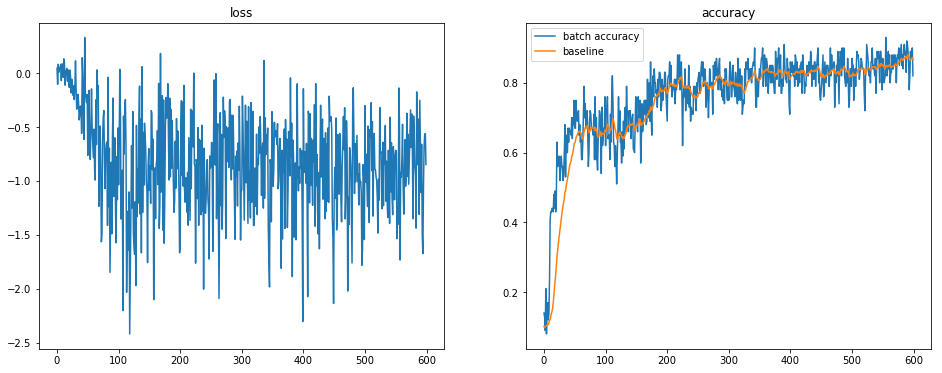

In [9]:
npstats = np.array(stats)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(npstats[:, 0])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(npstats[:, 1])
plt.plot(npstats[:, 2])
plt.legend(['batch accuracy', 'baseline'])
plt.title('accuracy')